In [1]:
# Load essential libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import numpy as np
from scipy.signal import butter, lfilter, freqz
from IPython.display import Image

from datetime import datetime

In [2]:
# Time and robot egomotion
time = []
standardized_time = []
standardized_time2 = []
compass_heading = []
speed = []

# sonde data
temp = []
PH = []
cond = [] # ms
chlorophyll = [] 
ODO = [] # mg/L
sonar = []
angular_z = []

# wp data
wp_time = []
wp_seq = []

In [3]:
initial_time = None
time_crop = 880
time_crop1 = 585
time_crop2 = 842

# File loading from relative path
file = '../../../Data/ISER2021/Sunapee-20200805-path-3.csv'
# File loading from relative path
file2 = '../../../Data/ISER2021/Sunapee-20200805-path-3-mavros.csv'

# original data
with open(file, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # robot data
        if initial_time is None:
            initial_time = float(row[0])
        
        current_time = float(row[0])
        
        #if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
        if current_time - initial_time <= time_crop:
            time.append(float(row[0]))
            compass_heading.append(float(row[4]))
            speed.append(float(row[10]))
            angular_z.append(float(row[18]))

            # sonde data
            temp.append(float(row[23]))
            PH.append(float(row[26]))
            cond.append(float(row[25]))
            chlorophyll.append(float(row[29]))
            ODO.append(float(row[30]))
            sonar.append(float(row[8]))


    minimum_time = min(time)
    for time_stamp in time:
        standardized_time.append(time_stamp - minimum_time)

# wp data 
with open(file2, 'r') as csvfile2:
    csvreader2 = csv.reader(csvfile2, delimiter=',')
    header = next(csvreader2)
    for row in csvreader2:
        current_time = float(row[0])
        
        #if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
        if current_time - initial_time <= time_crop:
            wp_time.append(float(row[0]))
            wp_seq.append(float(row[1]))
            
    for time_stamp in wp_time:
        standardized_time2.append(time_stamp - minimum_time)

In [4]:
# collision time around 790

### Compass heading

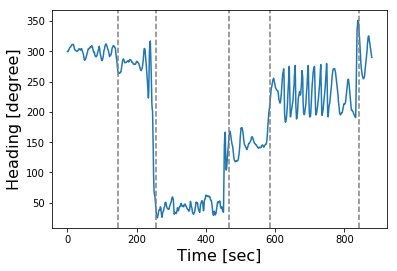

In [15]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Heading [degree]', fontsize=16)
ax1.plot(standardized_time, compass_heading, label='compass heading')
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

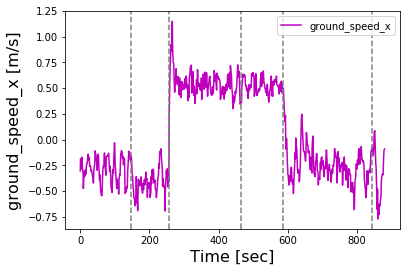

In [6]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ground_speed_x [m/s]', fontsize=16)
ax1.plot(standardized_time, speed, label='ground_speed_x', color='m')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

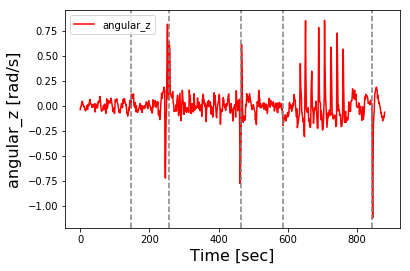

In [7]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('angular_z [rad/s]', fontsize=16)
ax1.plot(standardized_time, angular_z, label='angular_z', color='r')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

In [8]:
standardized_time2

[147.31666135787964,
 255.39561128616333,
 465.94755482673645,
 585.1033191680908,
 842.7955667972565]

### Temperature

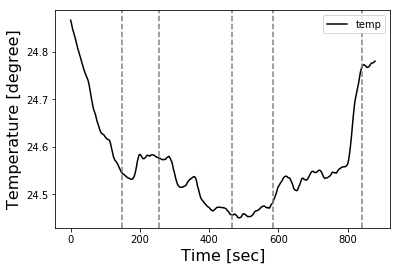

Standard Deviation of the temp is 0.09743715044058178 
Mean of the temp is 24.566061335261942 


In [9]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Temperature [degree]', fontsize=16)
ax1.plot(standardized_time, temp, label='temp', color='k')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(temp)))
print("Mean of the temp is % s " %(statistics.mean(temp))) 

### PH

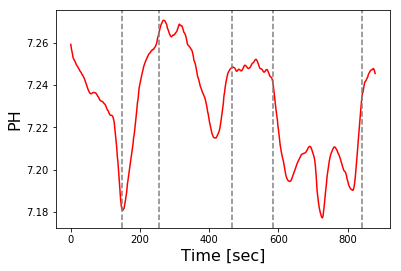

Standard Deviation of the temp is 0.024456170515012903 
Mean of the temp is 7.229825668001403 


In [17]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('PH', fontsize=16)
ax1.plot(standardized_time, PH, label='PH', color='r')
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(PH)))
print("Mean of the temp is % s " %(statistics.mean(PH))) 

### Conductivity

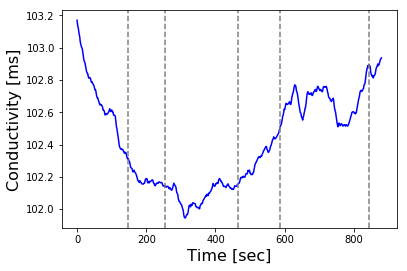

Standard Deviation of the chlorophyll is 0.2888326205153943 
Mean of the chlorophyll is 102.43008951693537 


In [11]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Conductivity [ms]', fontsize=16)
ax1.plot(standardized_time, cond, label='conductivity', color='b')
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(cond)))
print("Mean of the chlorophyll is % s " %(statistics.mean(cond)))

### Chlorophyll 

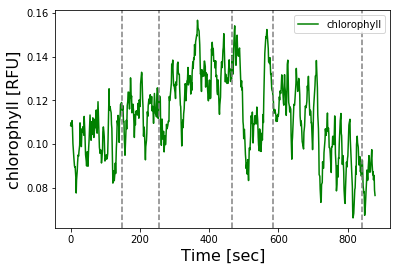

Standard Deviation of the chlorophyll is 0.018040479169376202 
Mean of the chlorophyll is 0.11254433143309456 


In [12]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('chlorophyll [RFU]', fontsize=16)
ax1.plot(standardized_time, chlorophyll, label='chlorophyll', color='g')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(chlorophyll)))
print("Mean of the chlorophyll is % s " %(statistics.mean(chlorophyll))) 

### ODO

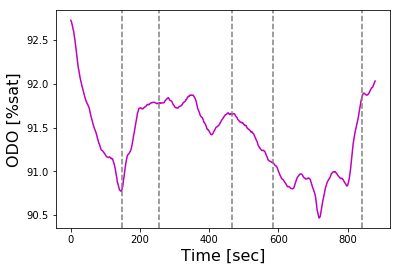

Standard Deviation of the DO is 0.43025385715257813 
Mean of the DO is 91.40506095461701 


In [13]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ODO [%sat]', fontsize=16)
ax1.plot(standardized_time, ODO, label='ODO', color='m')
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the DO is % s " %(statistics.stdev(ODO)))
print("Mean of the DO is % s " %(statistics.mean(ODO))) 

### Sonar depth

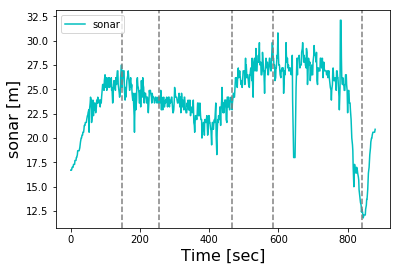

In [14]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('sonar [m]', fontsize=16)
ax1.plot(standardized_time, sonar, label='sonar', color='c')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

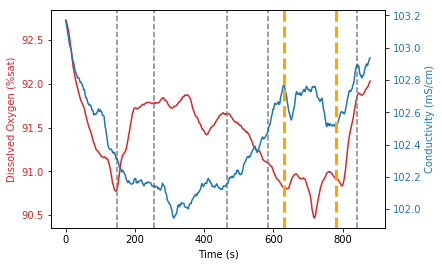

Standard Deviation of the DO is 0.43025385715257813 
Mean of the DO is 91.40506095461701 


In [67]:
# Figure initialization
fig, ax1 = plt.subplots()
color = 'tab:red'

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Dissolved Oxygen (%sat)', color=color)
ax1.plot(standardized_time, ODO, label='ODO', color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Conductivity (mS/cm)', color=color)
ax2.plot(standardized_time, cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axvline(x=630, color='orange', linestyle='--', LineWidth=3)
plt.axvline(x=780, color='orange', linestyle='--', LineWidth=3)

plt.show()
fig.savefig('0805-boateffect-sensor.pdf', bbox_inches ='tight')

print("Standard Deviation of the DO is % s " %(statistics.stdev(ODO)))
print("Mean of the DO is % s " %(statistics.mean(ODO))) 

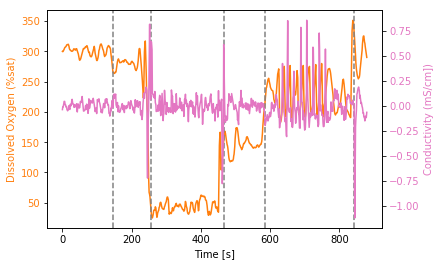

In [63]:
# Figure initialization
fig, ax1 = plt.subplots()
color = 'tab:orange'

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Dissolved Oxygen (%sat)', color=color)
ax1.plot(standardized_time, compass_heading, label='ODO', color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')

ax2 = ax1.twinx()

color = 'tab:pink'
ax2.set_ylabel('Conductivity (mS/cm])', color=color)
ax2.plot(standardized_time, angular_z, color=color)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_yticks(np.arange(0.0, 8.0, 0.5))

plt.show()


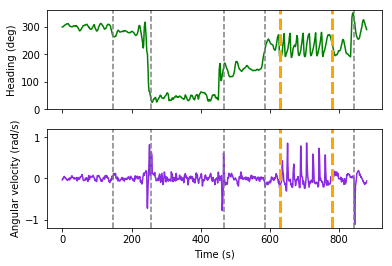

In [65]:
fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')
ax1.plot(standardized_time, compass_heading, color='green')
ax1.tick_params(axis='y')
ax1.tick_params(labelbottom=False)
ax1.set_ylim([0, 360])
ax1.set_ylabel('Heading (deg)')

ax2.plot(standardized_time, angular_z, color='blueviolet')
ax2.set_ylim([-1.2, 1.2])
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Angular velocity (rad/s)')

axis = (ax1, ax2)
for wp in standardized_time2:
    for each in axis:
        each.axvline(x=wp, color='gray', linestyle='--')
        each.axvline(x=630, color='orange', linestyle='--', LineWidth=3)
        each.axvline(x=780, color='orange', linestyle='--', LineWidth=3)
        
#ax1.axvline(x=630, color='orange', linestyle='--', LineWidth=3)
#ax1.axvline(x=780, color='orange', linestyle='--', LineWidth=3)
#ax2.axvline(x=630, color='orange', linestyle='--', LineWidth=3)
#ax2.axvline(x=780, color='orange', linestyle='--', LineWidth=3)
    
plt.show()
fig.savefig('0805-boateffect-prioceptive.pdf', bbox_inches ='tight')